##Numerical Integration in Modelling Flagellar Length Dynamics

Analysis of an incredible experiment in which one of the two flagella on a _Chlamydomonas_ cell was partially amputated -- resulting in a remarkable display of synchronized cellular regeneration.

With your model fleshed out, your task is now to numerically integrate it using the Forward Euler method outlined in lecture. (This can be accomplished succinctly in a single `for` loop).

Your result should be a plot of your solutions: the flagellar length dynamics over time, using the parameters supplied in the problem statement.

Note: because next week's tutorial is dedicated to watching _The Serengeti Rules_, we'll separately release a tutorial-style recording to help you tackle this problem, if you don't already feel equipped to tackle it.

In [ ]:
## relevant imports
import numpy as np
import matplotlib.pyplot as plt

## Question 2g

Using numerical integration, I know the value of the function and get the slope at one point, I will go in the direction of the slope in a small interval, and I will iterate through the process until I get a function. I will write code to solve for the function by looping through the timesteps  and using the previous value for the function to get the steady state.
I will multiply the total time by dt to convert the time from units of time to units of minutes. I set both L1 and L2 initially to 0 because there is no cutting in this situation.. 

In [ ]:
#parameters for numerical integration
P = pow(10, 5)  # monomers
k_on = 0.06 # min^-1
k_off = 0.001 # min^-1
c_0 = 0
R = 5 # monomers/s
D = 1 # micrometer^2 / s
A = 4* pow(10, -2) # micrometer^2 

dt = 0.01 # min
total_time = 3000 * dt
time_range = np.arange(0, total_time, dt)
#initial length 
L1_0 = 0 
L2_0 = 0

L1_t = np.zeros(len(time_range))
L2_t = np.zeros(len(time_range))

# set the initial condition at time t=0
L1_t[0] = L1_0
L2_t[0] = L2_0



To compute the length at each time, I will take small steps in time, find the slope at that time, and use the slope and the previous value to approximate the next value. 

In [ ]:
for i in range (len(time_range) - 1):
  # compute the change 
  dL1 = (k_on * (P - L1_t[i] - L2_t[i]) - k_off *(c_0 + R/(D*A)* L1_t[i])) * dt
  dL2 = (k_on * (P - L1_t[i] - L2_t[i]) - k_off *(c_0 + R/(D*A)* L2_t[i])) * dt
  # update the current number in the storage vector
  L1_t[i + 1] = L1_t[i] + dL1
  L2_t[i + 1] = L2_t[i] + dL2



Since the lengths computed are in units of monomers, I will convert to real unit length using the fact from tutorial that 1600 tubulin monomers to a micro meter. In the plot, I observe that the two curves overlap, since both L1 and L2 start out at 0 and the rate of change are dependent on each other so the slopes end up being the same.

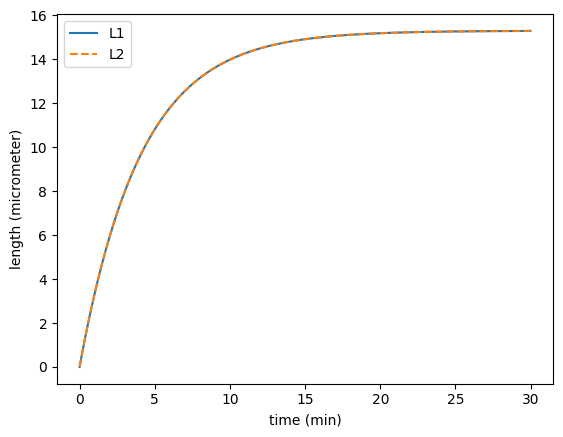

In [ ]:
# plot our integration
plt.plot(time_range, L1_t/1600, label='L1')
plt.plot(time_range, L2_t/1600, linestyle = 'dashed', label='L2')
plt.xlabel('time (min)')
plt.ylabel('length (micrometer)')
plt.legend()

After cutting, I will plot the regrowth dynamics by first calculating the steady state length, L* using the formula derived in 2f. I will also calculate the number of monomers and plugging in the parameters given in the question. I will also compute the new number of monomers since the starting length after one flagella is cut in the single-celled green algae Chlamydomonas reinhardtii is different from the intial length with both flagellas are not cut. 

In [ ]:
L_star = (k_on * P - k_off *c_0) / (2* k_on + k_off *(R / (D * A)))
P_new = P - L_star

In the regrowth dynamics, I will set the initial length of L1 to be the steady state length and for L2 to be 0. I will apply the similar process of numerical integration to approximate the length at each timestep. The change is similar to the formula given in the question and in the earlier plot, except the starting number of monomers is now P_new. 

In [ ]:
L1_0 = L_star #initial length 
L2_0 = 0

L1_t = np.zeros(len(time_range))
L2_t = np.zeros(len(time_range))

# set the initial condition at time t=0
L1_t[0] = L1_0
L2_t[0] = L2_0

for i in range (len(time_range) - 1):
  # compute the change 
  dL1 = (k_on * (P_new - L1_t[i] - L2_t[i]) - k_off *(c_0 + R/(D*A)* L1_t[i])) * dt
  dL2 = (k_on * (P_new - L1_t[i] - L2_t[i]) - k_off *(c_0 + R/(D*A)* L2_t[i])) * dt
  # update the current number in the storage vector
  L1_t[i + 1] = L1_t[i] + dL1
  L2_t[i + 1] = L2_t[i] + dL2



I will plot the length based on time in minutes. This time, I see the lengths of L1 and L2 equilibrate to about 11 micrometer. The plot is consistent with the experiment where there is some type of feedback control between two flagellas. When one is cut, the other will shrink and the one that is cut will grow, eventually reaching a new steady state length. 

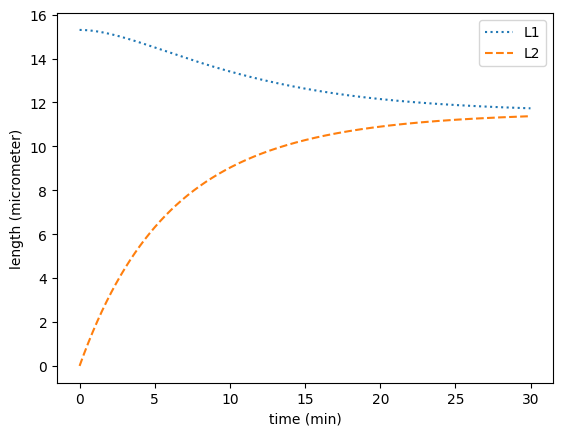

In [ ]:
# plot our integration
plt.plot(time_range, L1_t/1600, linestyle = 'dotted', label='L1')
plt.plot(time_range, L2_t/1600, linestyle = 'dashed', label='L2')
plt.xlabel('time (min)')
plt.ylabel('length (micrometer)')
plt.legend()